In [30]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt


dir = "/home/gdapoian/Ambizione/01_Confidential_Data/MoodDetection/"
# try with data on a pickle file, advantage load once
# open the pickle file in read mode
with open(os.path.join(dir,"longecg_longacc_and_imq.pickle"), "rb") as f:
    # load the data from the pickle file using pickle.load()
    data = pickle.load(f)


KeyboardInterrupt: 

In [ ]:
from scipy.signal import medfilt

def fix_baseline_wander(data, fs=128):
    """BaselineWanderRemovalMedian.m from ecg-kit.  Given a list of amplitude values
    (data) and sample rate (sr), it applies two median filters to data to
    compute the baseline.  The returned result is the original data minus this
    computed baseline.
    """
    #source : https://pypi.python.org/pypi/BaselineWanderRemoval/2017.10.25

    winsize = int(round(0.2*fs))
    # delayBLR = round((winsize-1)/2)
    if winsize % 2 == 0:
        winsize += 1
    baseline_estimate = medfilt(data, kernel_size=winsize)
    winsize = int(round(0.6*fs))
    # delayBLR = delayBLR + round((winsize-1)/2)
    if winsize % 2 == 0:
        winsize += 1
    baseline_estimate = medfilt(baseline_estimate, kernel_size=winsize)
    ecg_blr = data - baseline_estimate
    return ecg_blr



In [ ]:
import tqdm
for en,ecg in tqdm.tqdm(enumerate(data["x"])):
    data["x"][en]= fix_baseline_wander(ecg[-1843200:])

1it [00:09,  9.10s/it]


KeyboardInterrupt: 

In [31]:
import pickle
from  os.path import join as pjoin
pickle.dump(data, open(pjoin(dir,"4hecgBaslineRemoval_longacc_and_imq.pickle"), "wb"))

OSError: [Errno 28] No space left on device

In [ ]:
import numpy as np

def balance_accuracy(confusion_matrix):
    # Compute the number of classes
    num_classes = confusion_matrix.shape[0]
    # Compute the sum of true positives and false negatives for each class
    tp_fn = np.sum(confusion_matrix, axis=1)
    # Compute the true positive rate (sensitivity) for each class
    tpr = np.diag(confusion_matrix) / tp_fn
    # Compute the overall balance accuracy
    balance_acc = np.sum(tpr) / num_classes
    return balance_acc


def accuracy(confusion_matrix):
    # Compute the total number of predictions
    total_predictions = np.sum(confusion_matrix)
    # Compute the number of correct predictions
    correct_predictions = np.trace(confusion_matrix)
    # Compute the accuracy
    acc = correct_predictions / total_predictions
    return acc


cm = np.array([[18, 0, 0],[16,0,0],[16,0,0]])
balance_accuracy(cm), accuracy(cm)

(0.3333333333333333, 0.36)

In [33]:
df = pd.DataFrame(data)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

df.loc[df.uid=="S008", "y"]

127    [4, 1.0, 2, 6]
128    [4, 2.0, 2, 4]
129    [2, 3.0, 4, 3]
130    [5, 0.0, 1, 6]
131    [2, 2.0, 3, 5]
132    [4, 3.0, 2, 4]
133    [5, 1.0, 2, 5]
134    [6, 0.0, 1, 5]
135    [5, 2.0, 2, 4]
136    [3, 2.0, 3, 5]
137    [3, 3.0, 3, 4]
138    [3, 3.0, 3, 3]
139    [5, 0.0, 1, 6]
140    [2, 2.0, 3, 5]
141    [2, 3.0, 3, 4]
142    [3, 2.0, 3, 5]
143    [4, 3.0, 2, 3]
144    [4, 2.0, 3, 5]
145    [5, 3.0, 1, 5]
146    [5, 2.0, 2, 5]
147    [5, 2.0, 1, 5]
148    [4, 2.0, 3, 5]
149    [5, 1.0, 1, 5]
150    [2, 1.0, 4, 6]
151    [2, 2.0, 3, 5]
152    [5, 2.0, 2, 4]
153    [5, 3.0, 2, 4]
154    [4, 3.0, 3, 3]
155    [6, 4.0, 2, 2]
156    [2, 3.0, 4, 5]
157    [2, 3.0, 5, 4]
158    [2, 1.0, 6, 5]
159    [0, 2.0, 6, 4]
160    [2, 1.0, 2, 6]
161    [1, 2.0, 5, 4]
162    [3, 4.0, 3, 2]
163    [1, 2.0, 5, 5]
164    [4, 2.0, 3, 4]
165    [2, 2.0, 4, 5]
166    [3, 1.0, 2, 5]
167    [1, 3.0, 5, 4]
168    [2, 2.0, 5, 5]
169    [1, 1.0, 5, 4]
170    [1, 2.0, 5, 4]
171    [0, 2.0, 5, 5]
172    [3,

In [38]:
import numpy as np
a = np.asarray(df.loc[df.uid=="S008", "y"])
a.flatten()

array([list([4, 1.0, 2, 6]), list([4, 2.0, 2, 4]), list([2, 3.0, 4, 3]),
       list([5, 0.0, 1, 6]), list([2, 2.0, 3, 5]), list([4, 3.0, 2, 4]),
       list([5, 1.0, 2, 5]), list([6, 0.0, 1, 5]), list([5, 2.0, 2, 4]),
       list([3, 2.0, 3, 5]), list([3, 3.0, 3, 4]), list([3, 3.0, 3, 3]),
       list([5, 0.0, 1, 6]), list([2, 2.0, 3, 5]), list([2, 3.0, 3, 4]),
       list([3, 2.0, 3, 5]), list([4, 3.0, 2, 3]), list([4, 2.0, 3, 5]),
       list([5, 3.0, 1, 5]), list([5, 2.0, 2, 5]), list([5, 2.0, 1, 5]),
       list([4, 2.0, 3, 5]), list([5, 1.0, 1, 5]), list([2, 1.0, 4, 6]),
       list([2, 2.0, 3, 5]), list([5, 2.0, 2, 4]), list([5, 3.0, 2, 4]),
       list([4, 3.0, 3, 3]), list([6, 4.0, 2, 2]), list([2, 3.0, 4, 5]),
       list([2, 3.0, 5, 4]), list([2, 1.0, 6, 5]), list([0, 2.0, 6, 4]),
       list([2, 1.0, 2, 6]), list([1, 2.0, 5, 4]), list([3, 4.0, 3, 2]),
       list([1, 2.0, 5, 5]), list([4, 2.0, 3, 4]), list([2, 2.0, 4, 5]),
       list([3, 1.0, 2, 5]), list([1, 3.0, 5, 4]), 

In [ ]:
a[:,1]

array([1., 2., 3., 0., 2., 3., 1., 0., 2., 2., 3., 3., 0., 2., 3., 2., 3.,
       2., 3., 2.])

In [ ]:
np.abs(a[:,3]-6)

array([0., 2., 3., 0., 1., 2., 1., 1., 2., 1., 2., 3., 0., 1., 2., 1., 3.,
       1., 1., 1.])

(array([4., 0., 4., 0., 0., 5., 0., 6., 0., 1.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <BarContainer object of 10 artists>)

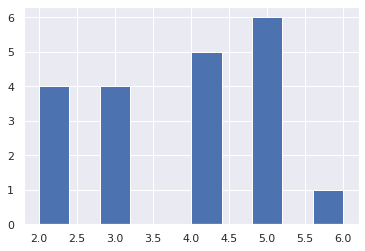

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.hist(a[:,0])

In [40]:
128*1*3600

460800